In [1]:
%matplotlib inline
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
figsize = [12, 4]

proj_dir = '/Users/yunjunz/data/archives/ChileSenAT149'
os.chdir(proj_dir)
print('Go to directory', proj_dir)

mintpy_dir = os.path.join(proj_dir, 'mintpyOffset')
out_file = os.path.join(mintpy_dir, 'TS_era5.pickle')

Go to directory /Users/yunjunz/data/archives/ChileSenAT149


### 1. calc tropo delay

In [2]:
ts_files = [
    os.path.join(mintpy_dir, 'inputs/ERA5.h5'),
    os.path.join(mintpy_dir, 'inputs/ERA5dry.h5'),
    os.path.join(mintpy_dir, 'inputs/ERA5wet.h5'),
]

# calculate absolute tropospheric delay from ERA5
for ts_file in ts_files:
    if not os.path.isfile(ts_file):
        os.chdir(mintpy_dir)
        !tropo_pyaps3.py -f timeseriesRg.h5 -g inputs/geometryRadar.h5
        os.chdir(proj_dir)

# read data
date_list = timeseries(ts_files[0]).get_date_list()
num_date = len(date_list)
atr = readfile.read_attribute(ts_files[0])
length, width = int(atr['LENGTH']), int(atr['WIDTH'])
ind_center = int(length / 2) * length + int(width / 2)

ts_comb = readfile.read(ts_files[0])[0].reshape(num_date, -1)
ts_dry  = readfile.read(ts_files[1])[0].reshape(num_date, -1)
ts_wet  = readfile.read(ts_files[2])[0].reshape(num_date, -1)

# calculate median and mean
tropo_med = np.nanmedian(ts_comb, axis=-1)
tropo_avg = np.nanmean(ts_comb, axis=-1)
tropo_cen = ts_comb[:, ind_center]

tropo_dry_med = np.nanmedian(ts_dry, axis=-1)
tropo_wet_med = np.nanmedian(ts_wet, axis=-1)

### 2. save to pickle file

In [3]:
## compose off dict
tropo = {}
tropo['date'] = np.array(date_list)
tropo['time'] = np.array(ptime.date_list2vector(date_list)[0])
tropo['range_delay_tropo_median'] = tropo_med
tropo['range_delay_tropo_mean']   = tropo_avg
tropo['range_delay_tropo_center'] = tropo_cen
tropo['range_delay_tropo_dry_median'] = tropo_dry_med
tropo['range_delay_tropo_wet_median'] = tropo_wet_med

## save off dict to pickle file
with open(out_file, 'wb') as f:
    pickle.dump(tropo, f)
    print('save data to file: {}'.format(out_file))

save data to file: /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_era5.pickle


### 3. plot

save figure to file /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_tropo.png


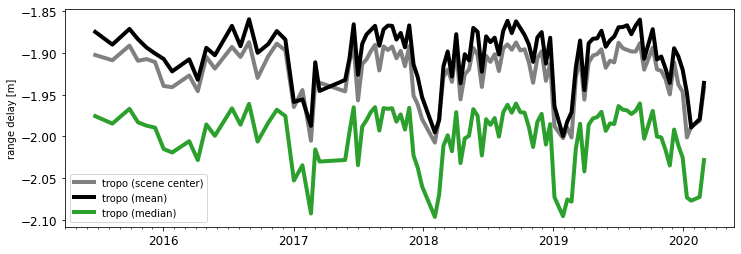

In [6]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(tropo['time'], tropo['range_delay_tropo_center'], linewidth=4, color='gray', label='tropo (scene center)')
ax.plot(tropo['time'], tropo['range_delay_tropo_mean'],   linewidth=4, color='k',    label='tropo (mean)')
ax.plot(tropo['time'], tropo['range_delay_tropo_median'], linewidth=4, color='C2',   label='tropo (median)')
pp.auto_adjust_xaxis_date(ax, tropo['time'], every_year=1, buffer_year=None)
ax.set_ylabel('range delay [m]')
plt.legend()

# output
out_fig = os.path.join(mintpy_dir, 'TS_tropo.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### 3a. difference between `median-mean` and `median-center`

save figure to file /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_tropo_diff.png


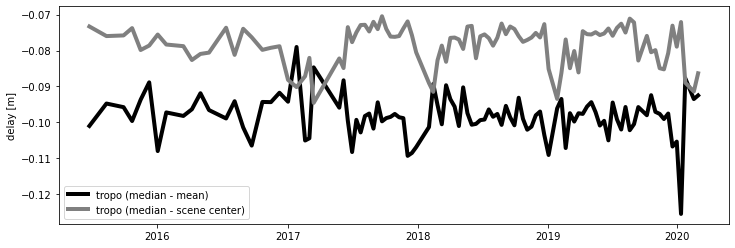

In [7]:
# plot median / mean / center difference
fig, ax = plt.subplots(figsize=figsize)
ax.plot(tropo['time'], tropo['range_delay_tropo_median'] - tropo['range_delay_tropo_mean'],   linewidth=4, color='k',    label='tropo (median - mean)')
ax.plot(tropo['time'], tropo['range_delay_tropo_median'] - tropo['range_delay_tropo_center'], linewidth=4, color='gray', label='tropo (median - scene center)')
ax.set_ylabel('delay [m]')
plt.legend()

# output
out_fig = os.path.join(mintpy_dir, 'TS_tropo_diff.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

### 3b. variation between dry and wet troposphere

Dry troposphere: large absolute value with little variation

Wet troposphere: small absolute value with large  variation

save figure to file /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_tropo_dry_wet.png


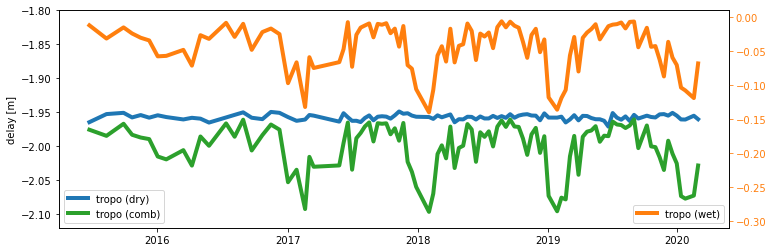

In [8]:
# plot
fig, ax = plt.subplots(figsize=figsize)
ax.plot(tropo['time'], tropo['range_delay_tropo_dry_median'], linewidth=4, color='C0', label='tropo (dry)')
ax.plot(tropo['time'], tropo['range_delay_tropo_median'],     linewidth=4, color='C2', label='tropo (comb)')
ax.set_ylabel('delay [m]')
ax.set_ylim(-2.12, -1.8)   #0.32
ax.legend(loc='lower left')

ax2 = ax.twinx()
ax2.plot(tropo['time'], tropo['range_delay_tropo_wet_median'],  linewidth=4, color=pp.mplColors[1], label='tropo (wet)')
ax2.tick_params(which='both', axis='y', colors=pp.mplColors[1])
ax2.set_ylim(-0.31, 0.01)  #0.32
ax2.legend(loc='lower right')

# output
out_fig = os.path.join(mintpy_dir, 'TS_tropo_dry_wet.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()